## Keras -- MLPs on MNIST

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist 
import seaborn as sns
from tensorflow.keras.initializers import RandomNormal

C:\Users\venka\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\venka\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\venka\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\venka\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [8]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = utils.to_categorical(y_train, 10) 
Y_test = utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [11]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation 


In [12]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [13]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 1s 19us/sample - loss: 1.2624 - acc: 0.7057 - val_loss: 0.8031 - val_acc: 0.8340
Epoch 2/20
60000/60000 [==============================] - 1s 20us/sample - loss: 0.7111 - acc: 0.8400 - val_loss: 0.6038 - val_acc: 0.8644
Epoch 3/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.5844 - acc: 0.8603 - val_loss: 0.5233 - val_acc: 0.8749
Epoch 4/20
60000/60000 [==============================] - 1s 16us/sample - loss: 0.5234 - acc: 0.8698 - val_loss: 0.4785 - val_acc: 0.8821
Epoch 5/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.4863 - acc: 0.8768 - val_loss: 0.4489 - val_acc: 0.8874
Epoch 6/20
60000/60000 [==============================] - 1s 17us/sample - loss: 0.4607 - acc: 0.8805 - val_loss: 0.4278 - val_acc: 0.8907
Epoch 7/20
60000/60000 [==============================] - 1s 17us/sa

Test score: 0.3358618676304817
Test accuracy: 0.9095


<IPython.core.display.Javascript object>


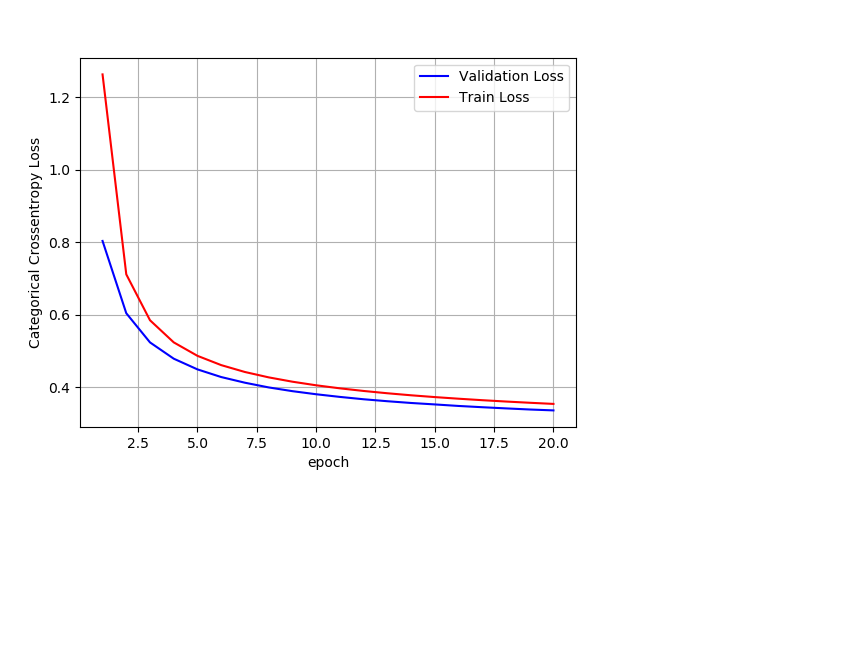

In [15]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

 <h3>  MLP + Sigmoid activation + SGDOptimizer </h3>

In [16]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 67us/sample - loss: 2.2662 - acc: 0.2286 - val_loss: 2.2161 - val_acc: 0.4671
Epoch 2/20
60000/60000 [==============================] - 4s 62us/sample - loss: 2.1692 - acc: 0.4489 - val_loss: 2.1107 - val_acc: 0.4521
Epoch 3/20
60000/60000 [==============================] - 4s 63us/sample - loss: 2.0453 - acc: 0.5632 - val_loss: 1.9593 - val_acc: 0.5856
Epoch 4/20
60000/60000 [==============================] - 4s 66us/sample - loss: 1.8685 - acc: 0.6276 - val_loss: 1.7516 - val_acc: 0.6482
Epoch 5/20
60000/60000 [==============================] - 4s 60us/sample - loss: 1.6443 - acc: 0.6701 - val_loss: 1.5106 - val_acc: 0.7139
Epoch 6/20
60000/60000 [==============================] - 4s 61us/sample - loss: 1.4126 - acc: 0.7119 - val_loss: 1.2901 - val_acc: 0.7539
Epoch 7/20
60000/60000 [==============================] - 4s 60us/sample - loss: 1.2142 - acc: 0.7437 - val_loss: 1.

Test score: 0.4621630812883377
Test accuracy: 0.8775


<IPython.core.display.Javascript object>


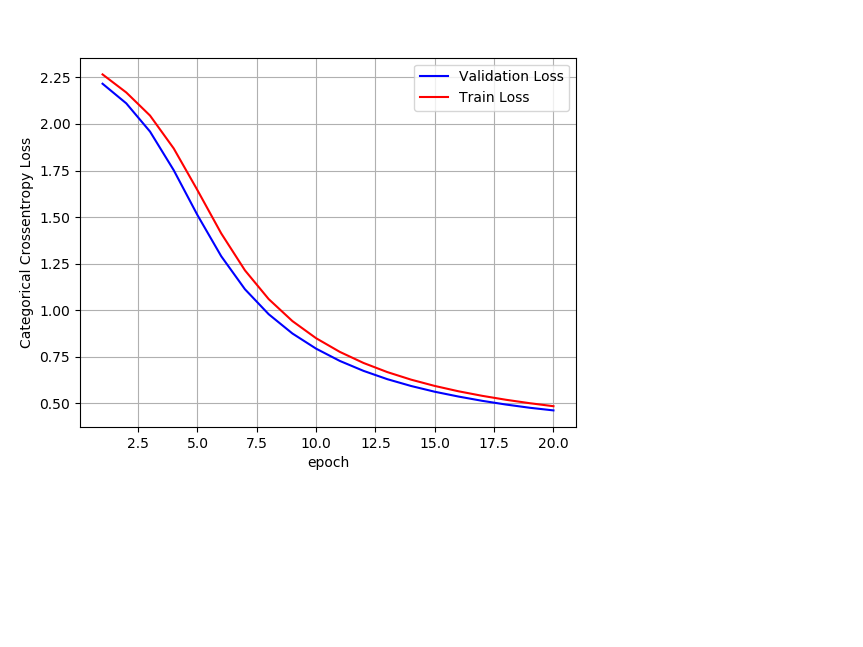

In [18]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [19]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>

C:\Users\venka\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<h2>MLP + Sigmoid activation + ADAM </h2>

In [20]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 90us/sample - loss: 0.5145 - acc: 0.8673 - val_loss: 0.2545 - val_acc: 0.9245
Epoch 2/20
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2212 - acc: 0.9349 - val_loss: 0.1844 - val_acc: 0.9440
Epoch 3/20
60000/60000 [==============================] - 5s 83us/sample

Test score: 0.06570454306304528
Test accuracy: 0.9831


<IPython.core.display.Javascript object>


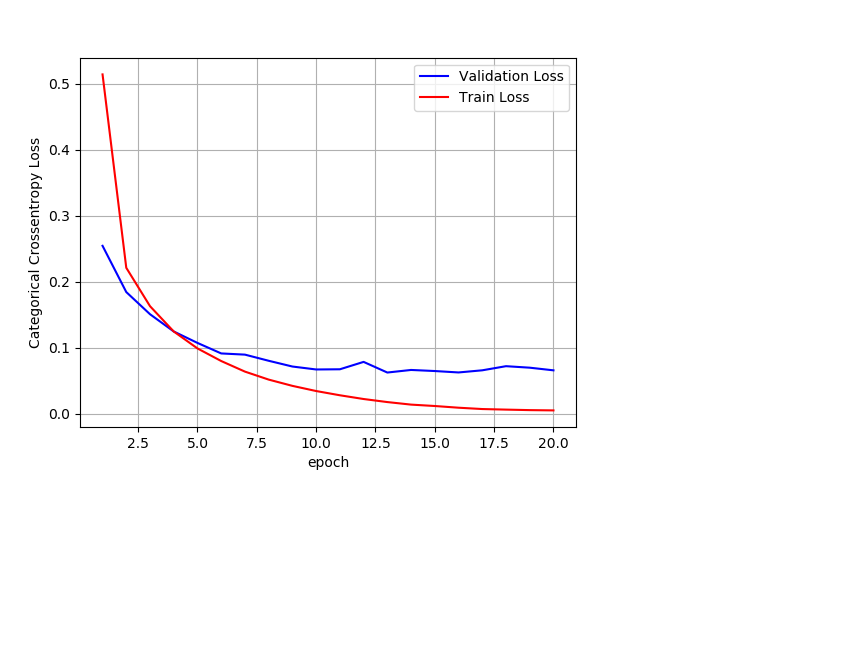

In [21]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [22]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>

C:\Users\venka\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<h2> MLP + ReLU +SGD </h2>

In [23]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in)  = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.7617 - acc: 0.7850 - val_loss: 0.3877 - val_acc: 0.8930
Epoch 2/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3531 - acc: 0.9005 - val_loss: 0.2968 - val_acc: 0.9164
Epoch 3/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2887 - acc: 0.9177 - val_loss: 0.2585 - val_acc: 0.9267
Epoch 4/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2531 - acc: 0.9279 - val_loss: 0.2309 - val_acc: 0.9341
Epoch 5/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2286 - acc: 0.9349 - val_loss: 0.2137 - val_acc: 0.9379
Epoch 6/20
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2101 - acc: 0.9400 - val_loss: 0.1997 - val_acc: 0.9430
Epoch 7/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1951 - acc: 0.9446 - val_loss: 0.

Test score: 0.11833062280341983
Test accuracy: 0.9634


<IPython.core.display.Javascript object>


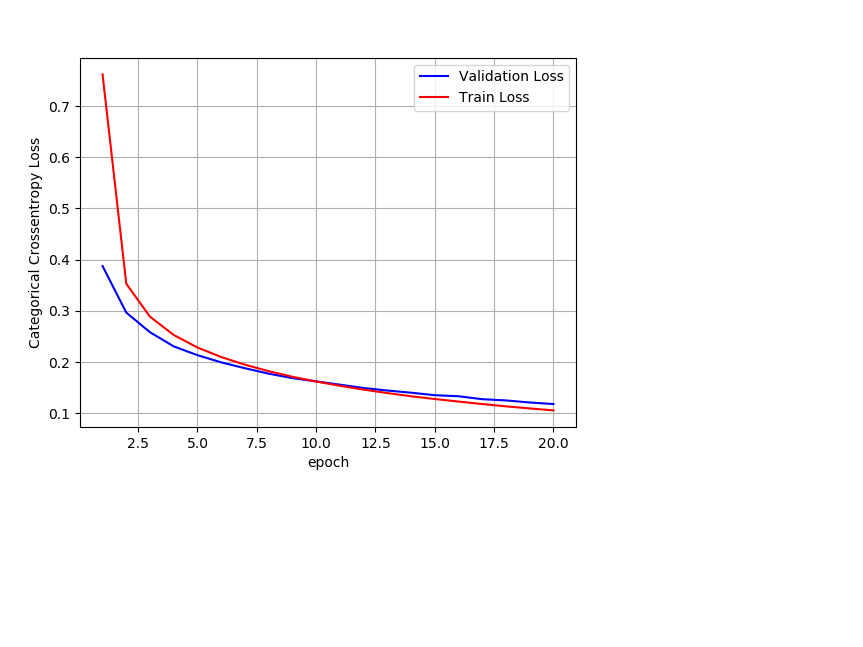

In [25]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU + ADAM </h2>

In [27]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 118us/sample - loss: 0.2180 - acc: 0.9336 - val_loss: 0.1090 - val_acc: 0.9678
Epoch 2/20
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0843 - acc: 0.9748 - val_loss: 0.0894 - val_acc: 0.9712
Epoch 3/20
60000/60000 [==============================] - 6s 106u

Test score: 0.09204073272184642
Test accuracy: 0.9826


<IPython.core.display.Javascript object>


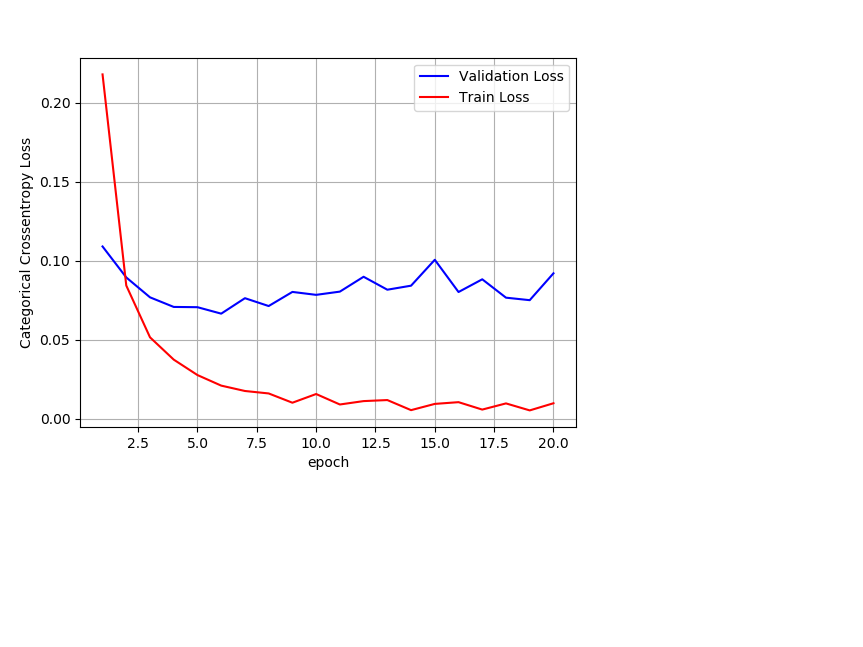

In [28]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [29]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>

C:\Users\venka\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [30]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from tensorflow.keras.layers import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_v1 (Batc (None, 512)               2048      
_________________________________________________________________
dense_14 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 128)               512       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [31]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from tensorflow.keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())


model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_v1_2 (Ba (None, 512)               2048      
_________________________________________________________________
dense_17 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_v1_3 (Ba (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
Total params: 471,434
Train

In [32]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 145us/sample - loss: 0.3052 - acc: 0.9100 - val_loss: 0.2188 - val_acc: 0.9365
Epoch 2/20
60000/60000 [==============================] - 8s 134us/sample - loss: 0.1786 - acc: 0.9469 - val_loss: 0.1760 - val_acc: 0.9483
Epoch 3/20
49792/60000 [=======================>......] - ETA: 1s - loss: 0.1373 - acc: 0.9585

KeyboardInterrupt: 

In [ ]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 5. MLP + Dropout + AdamOptimizer </h2>

In [ ]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from tensorflow.keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

In [ ]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

In [ ]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> Hyper-parameter tuning of Keras models using Sklearn </h2>

In [ ]:
from tensorflow.keras.optimizers import Adam,RMSprop,SGD
def best_hyperparameters(activ):

    model = Sequential()
    model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [ ]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

activ = ['sigmoid','relu']

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(activ=activ)

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, Y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# ASSIGNMENT

## MLP + ReLU + Adam + BatchNormalization + Dropout

2 Hidden Layers MLP

In [13]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

model_batch = Sequential()

model_batch.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dropout(0.5))

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
batch_normalization_v1 (Batc (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)      

In [14]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 8s 134us/sample - loss: 0.3256 - acc: 0.9026 - val_loss: 0.1279 - val_acc: 0.9593
Epoch 2/20
60000/60000 [==============================] - 6s 107us/sample - loss: 0.1467 - acc: 0.9557 - val_loss: 0.0972 - val_acc: 0.9688
Epoch 3/20
60000/60000 [==============================] - 6s 100us/sample - loss: 0.1081 - acc: 0.9666 - val_loss: 0.0764 - val_acc: 0.9747
Epoch 4/20
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0880 - acc: 0.9724 - val_loss: 0.0775 - val_acc: 0.9766
Epoch 5/20
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0753 - acc: 0.9769 - val_loss: 0.0789 - val_acc: 0.9765
Epoch 6/20
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0640 - acc: 0.9795 - val_loss: 0.0747 - val_acc: 0.9780
Epoch 7/20
60000/60000 [==============================] - 6s 1

Test score: 0.06799688884797907
Test accuracy: 0.9823


<IPython.core.display.Javascript object>


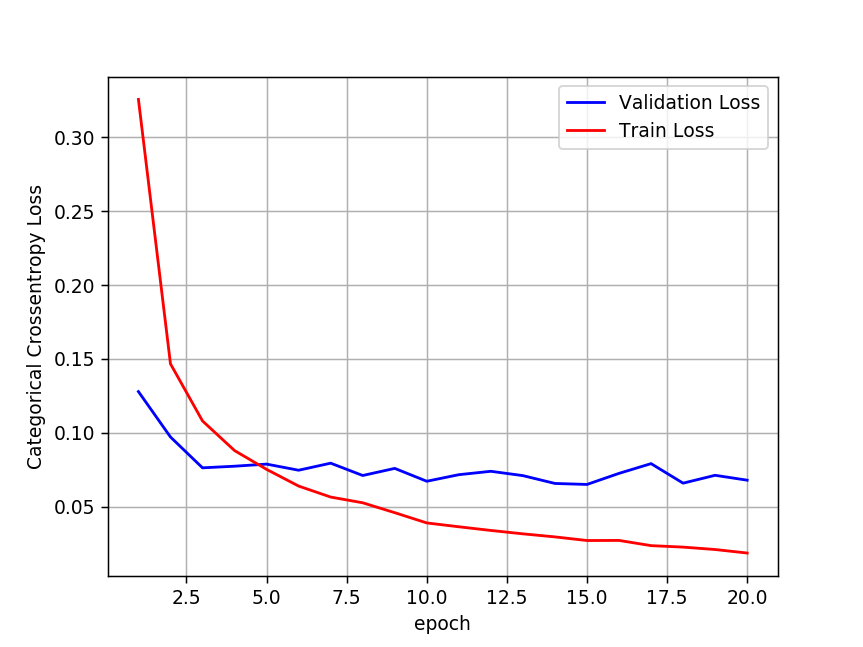

In [15]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### 3 Hidden Layers MLP

In [16]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h3 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

model_batch = Sequential()

model_batch.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.120, seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dropout(0.5))

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_v1_2 (Ba (None, 512)               2048      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_v1_3 (Ba (None, 256)               1024      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_v1_4 (Ba (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

In [17]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 143us/sample - loss: 0.3095 - acc: 0.9073 - val_loss: 0.1288 - val_acc: 0.9592
Epoch 2/20
60000/60000 [==============================] - 7s 116us/sample - loss: 0.1246 - acc: 0.9633 - val_loss: 0.0855 - val_acc: 0.9724
Epoch 3/20
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0851 - acc: 0.9743 - val_loss: 0.0804 - val_acc: 0.9751
Epoch 4/20
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0663 - acc: 0.9798 - val_loss: 0.0785 - val_acc: 0.9762
Epoch 5/20
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0520 - acc: 0.9836 - val_loss: 0.0737 - val_acc: 0.9774
Epoch 6/20
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0469 - acc: 0.9852 - val_loss: 0.0704 - val_acc: 0.9785
Epoch 7/20
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0401 - acc: 0.9868 - val_l

Test score: 0.07431878167927634
Test accuracy: 0.9822


<IPython.core.display.Javascript object>


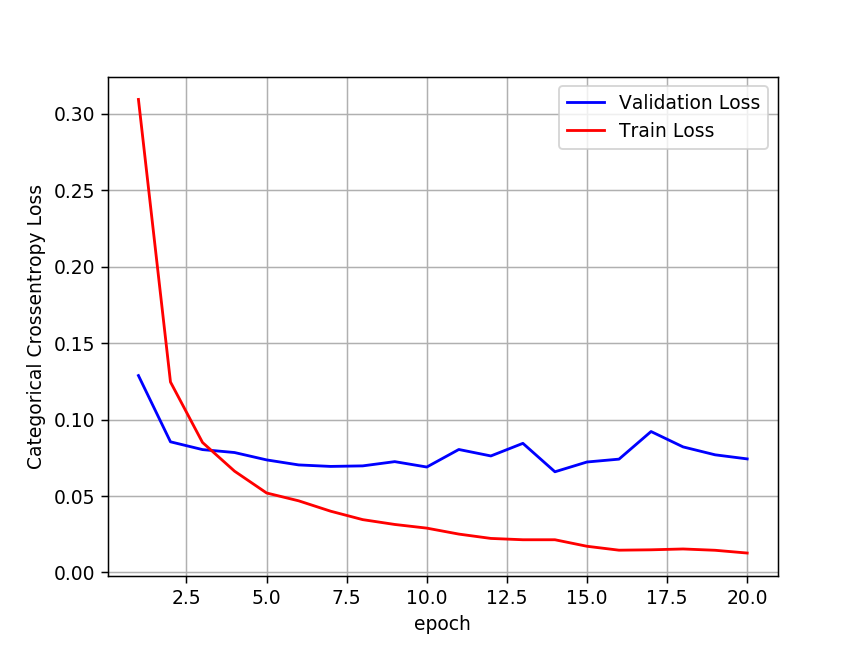

In [18]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### 4 Hidden Layers MLP

In [19]:
# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h3 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

model_batch = Sequential()

model_batch.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.120, seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dropout(0.5))

model_batch.add(Dense(output_dim, activation='softmax'))

model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_v1_5 (Ba (None, 512)               2048      
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_v1_6 (Ba (None, 256)               1024      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_v1_7 (Ba (None, 256)               1024      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
__________

In [20]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 159us/sample - loss: 0.3237 - acc: 0.9036 - val_loss: 0.1198 - val_acc: 0.9652
Epoch 2/20
60000/60000 [==============================] - 9s 145us/sample - loss: 0.1239 - acc: 0.9626 - val_loss: 0.0914 - val_acc: 0.9711
Epoch 3/20
60000/60000 [==============================] - 9s 144us/sample - loss: 0.0847 - acc: 0.9737 - val_loss: 0.0858 - val_acc: 0.9735
Epoch 4/20
60000/60000 [==============================] - 9s 142us/sample - loss: 0.0635 - acc: 0.9802 - val_loss: 0.0749 - val_acc: 0.9757
Epoch 5/20
60000/60000 [==============================] - 8s 139us/sample - loss: 0.0553 - acc: 0.9828 - val_loss: 0.0809 - val_acc: 0.9757
Epoch 6/20
60000/60000 [==============================] - 9s 143us/sample - loss: 0.0438 - acc: 0.9859 - val_loss: 0.0751 - val_acc: 0.9766
Epoch 7/20
60000/60000 [==============================] - 8s 140us/sample - loss: 0.0392 - acc: 0.9876 - val_

Test score: 0.08088387649682172
Test accuracy: 0.9827


<IPython.core.display.Javascript object>


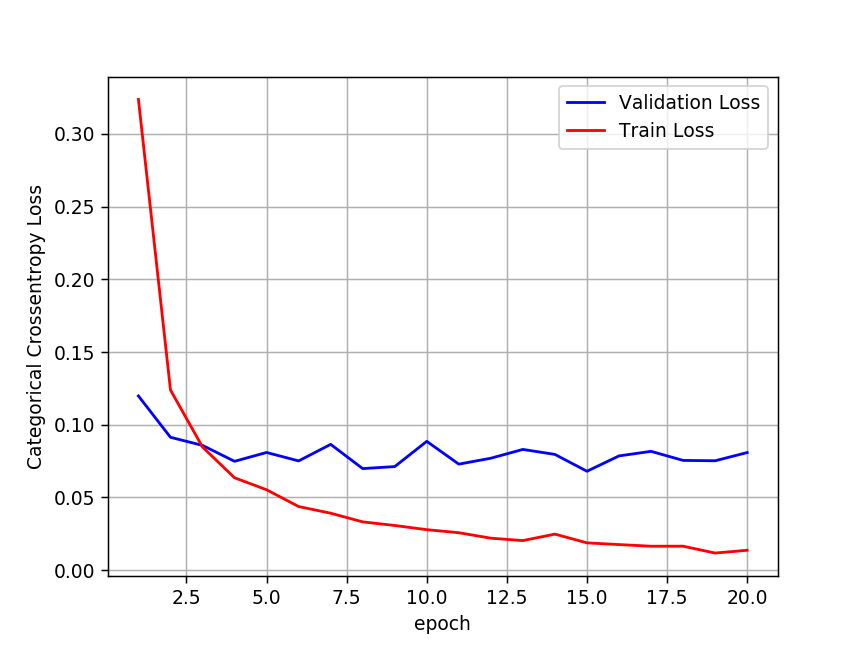

In [21]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
k